In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tourism_rating.csv to tourism_rating.csv


In [ ]:
tourism = pd.read_csv('tourism_rating.csv')

In [ ]:
tourism.head()

,User_Id,Place_Id,Place_Ratings
0,1,322,3
1,1,304,2
2,1,171,5
3,1,407,3
4,1,270,4


In [ ]:
tourism.shape

(10000, 3)

In [ ]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tourism, test_size=0.2, random_state=42)

In [ ]:
train.head()

,User_Id,Place_Id,Place_Ratings
9254,278,162,3
1561,49,297,2
1670,52,388,2
6087,183,34,1
6669,200,188,5


In [ ]:
test.head()

,User_Id,Place_Id,Place_Ratings
6252,188,375,3
4684,142,218,2
1731,54,37,3
4742,144,89,3
4521,138,391,5


In [ ]:
n_users = len(tourism.User_Id.unique())
n_users

300

In [ ]:
n_tourisms = len(tourism.Place_Id.unique())
n_tourisms

449

In [ ]:
# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, tourism_input], out)
model2.compile('adam', 'mean_squared_error')

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tourism-Input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Tourism-Embedding (Embedding)   (None, 1, 5)         2250        Tourism-Input[0][0]              
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         1505        User-Input[0][0]                 
______________________________________________________________________________________________

In [ ]:
#from keras.models import load_model

#if os.path.exists('regression_model2.h5'):
    #model2 = load_model('regression_model2.h5')
#else:
history = model2.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20, verbose=1)
    #model2.save('regression_model2.h5')


Epoch 1/20
250/250 [==============================] - 14s 1ms/step - loss: 4.9520
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 1.8820
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7958
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7683
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7413
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 1.7480
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 1.7612
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 1.7629
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 1.7233
Epoch 10/20
250/250 [==============================] - 0s 1ms/step - loss: 1.6811
Epoch 11/20
250/250 [==============================] - 0s 2ms/step - loss: 1.6886
Epoch 12/20
250/250 [==============================] - 0s 1ms/step - loss: 1.5877
Epoch 13/20
250/250 [===

Text(0, 0.5, 'Training Error')

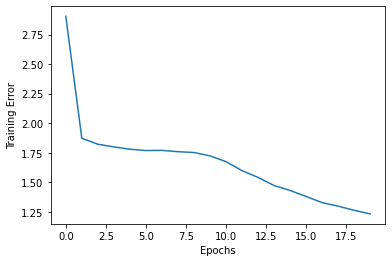

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model2.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

63/63 [==============================] - 1s 1ms/step - loss: 2.5816


2.5815699100494385

In [ ]:
model2.save('recommendation_rating_model.h5')

In [ ]:
id_place = range(1,20)

In [ ]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(tourism.Place_Id)))
tourism_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
id_user = 3

In [ ]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Predict

In [ ]:
predictions = model2.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

array([179, 202,  65, 171, 374, 446, 291, 328,  30, 134])

In [ ]:
# print predicted scores
predictions[recommended_tourism_ids]

array([5.1692457, 5.022547 , 5.010778 , 4.9991155, 4.851999 , 4.8221316,
       4.820102 , 4.813919 , 4.794994 , 4.791098 ], dtype=float32)